# Topic Modeling

Every day, copious volumes of data are gathered. As more information gets accessible, it becomes more harder to find what we are seeking. Therefore, we need tools and methods to organize, search, and comprehend huge amounts of information. Topic modelling offers strategies for organizing, comprehending, and summarizing vast volumes of textual data. It aids in:

* Identifying hidden subject trends throughout the collection; 
* Annotating texts in accordance with these themes.
* Organizing, searching, and summarizing texts using annotations


Topic modelling is a technique for identifying a group of words (i.e. topic) from a set of documents that best reflects the information in the set. It may also be seen as a kind of text mining — a technique for identifying repeated word patterns in textual content. In this research, unsupervised algorithms will be used to cluster/group reviews in order to discover major topics/ideas in the sea of text. This will apply to all textual evaluations, but we will concentrate on Twitter data since it is more real-world and nuanced than reviews gathered via review or survey forms.

# 1. Importing Libraries

In [1]:
import nltk
import numpy as np
import pandas as pd
import re #remove regex
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [2]:
nltk.download_gui()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
ls

Topic+Modeling.ipynb  topic_modeling.ipynb
clustered_tweets.csv  tweets.csv


# 2. Loading dataset

In [4]:
raw_data=pd.read_csv('tweets.csv',encoding='ISO-8859-1')
print(len(raw_data))

21047


In [5]:
df=raw_data.copy()
df.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  
0  Please check what happens to this no 940417705...  ['vodafonein']  
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']  
2  This has been going on since 3rd... this absol...  ['vodafonein']  
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']  
4  But when???Still I am not received any call fr...  ['vodafonein']

In [6]:
unique_text=df.tweet.unique()
print(len(unique_text))

21047


`Observation`: no duplicate tweet

In [7]:
df['tweet'][444]#show the tweet message; various topic present

'Can you share me good plan and can tell me how can i port my network operator'

In [8]:
#remove certain pattern
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    #print(input_text)
    #print(r)
    for i in r:
        input_text=re.sub(i, '',input_text)
    return input_text

# remove any @ mentions

In [9]:
df['clean_text']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df['clean_text']

0        Please check what happens to this no 940417705...
1        Network fluctuations and 4G Speed is pathetic....
2        This has been going on since 3rd... this absol...
3          I have done my recharge of 555 on 9709333370...
4        But when???Still I am not received any call fr...
                               ...                        
21042    I sent u my contact no. But still did not get ...
21043    dear   i have bn facing ur network problem for...
21044    rubbish i made many time   you didn't resolved...
21045    Why the caller tunes sound so horrible? if a s...
21046      what nonsense are u guys saying??? I'm getti...
Name: clean_text, Length: 21047, dtype: object

# remove anything, except alphabet letter

In [10]:
df['clean_text']=df['clean_text'].str.replace("[^a-zA-Z]"," ")
df['clean_text']

/var/folders/70/xyz7khq54gx8qklx52wtt6tw0000gn/T/ipykernel_88271/1006881913.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df['clean_text'].str.replace("[^a-zA-Z]"," ")


0        Please check what happens to this no          ...
1        Network fluctuations and  G Speed is pathetic ...
2        This has been going on since  rd    this absol...
3          I have done my recharge of     on           ...
4        But when   Still I am not received any call fr...
                               ...                        
21042    I sent u my contact no  But still did not get ...
21043    dear   i have bn facing ur network problem for...
21044    rubbish i made many time   you didn t resolved...
21045    Why the caller tunes sound so horrible  if a s...
21046      what nonsense are u guys saying    I m getti...
Name: clean_text, Length: 21047, dtype: object

# Convert the lower case

In [11]:
df['clean_text']=df['clean_text'].str.lower()
df['clean_text']

0        please check what happens to this no          ...
1        network fluctuations and  g speed is pathetic ...
2        this has been going on since  rd    this absol...
3          i have done my recharge of     on           ...
4        but when   still i am not received any call fr...
                               ...                        
21042    i sent u my contact no  but still did not get ...
21043    dear   i have bn facing ur network problem for...
21044    rubbish i made many time   you didn t resolved...
21045    why the caller tunes sound so horrible  if a s...
21046      what nonsense are u guys saying    i m getti...
Name: clean_text, Length: 21047, dtype: object

# remove all the space and any words which is less than 2

In [12]:
df['clean_text']=df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  \
0  Please check what happens to this no 940417705...  ['vodafonein']   
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          clean_text  
0  please check what happens this not woking sinc...  
1  network fluctuations and speed pathetic need j...  
2  this has been going since this absolutely unpr...  
3  have done recharge but haven got perday with u...  
4  but when still not received any call from cust...

# tokenizing data and Identify special instances of tweets

In [13]:
tokenized_tweet=df['clean_text'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [please, check, what, happens, this, not, woki...
1    [network, fluctuations, and, speed, pathetic, ...
2    [this, has, been, going, since, this, absolute...
3    [have, done, recharge, but, haven, got, perday...
4    [but, when, still, not, received, any, call, f...
Name: clean_text, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]= ' '.join(tokenized_tweet[i])
df['clean_text']=tokenized_tweet

In [15]:
df['clean_text'].head()

0    please check what happens this not woking sinc...
1    network fluctuations and speed pathetic need j...
2    this has been going since this absolutely unpr...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: clean_text, dtype: object

In [16]:
df

username        date  \
0       shivaji_takey  10-06-2020   
1       sarasberiwala  10-06-2020   
2          chitreamod  10-06-2020   
3        sanjan_suman  10-06-2020   
4            t_nihsit  10-06-2020   
...               ...         ...   
21042       mvjdobhal  31-05-2020   
21043  valleyofpeace2  31-05-2020   
21044  mushtabaarshad  31-05-2020   
21045        gouravgv  31-05-2020   
21046       v_manoj19  31-05-2020   

                                                   tweet  \
0      Please check what happens to this no 940417705...   
1      Network fluctuations and 4G Speed is pathetic....   
2      This has been going on since 3rd... this absol...   
3      @VodafoneIN  I have done my recharge of 555 on...   
4      But when???Still I am not received any call fr...   
...                                                  ...   
21042  I sent u my contact no. But still did not get ...   
21043  dear @VodafoneIN  i have bn facing ur network ...   
21044  rubbish i made many time @VodafoneIN  you didn...   
21045  Why the caller tunes sound so horrible? if a s...   
21046  @VodafoneIN @idea_cares what nonsense are u gu...   

                                                mentions  \
0                                         ['vodafonein']   
1                                         ['vodafonein']   
2                                         ['vodafonein']   
3                                         ['vodafonein']   
4                                         ['vodafonein']   
...                                                  ...   
21042                                     ['vodafonein']   
21043                                     ['vodafonein']   
21044                                     ['vodafonein']   
21045  ['airtelindia', 'idea', 'vodafonein', 'bsnlcor...   
21046                       ['vodafonein', 'idea_cares']   

                                              clean_text  
0      please check what happens this not woking sinc...  
1      network fluctuations and speed pathetic need j...  
2      this has been going since this absolutely unpr...  
3      have done recharge but haven got perday with u...  
4      but when still not received any call from cust...  
...                                                  ...  
21042        sent contact but still did not get response  
21043  dear have facing network problem for few days ...  
21044  rubbish made many time you didn resolved netwo...  
21045  why the caller tunes sound horrible song heard...  
21046  what nonsense are guys saying getting all the ...  

[21047 rows x 5 columns]

In [17]:
df.loc[:,('clean_text')]

0        please check what happens this not woking sinc...
1        network fluctuations and speed pathetic need j...
2        this has been going since this absolutely unpr...
3        have done recharge but haven got perday with u...
4        but when still not received any call from cust...
                               ...                        
21042          sent contact but still did not get response
21043    dear have facing network problem for few days ...
21044    rubbish made many time you didn resolved netwo...
21045    why the caller tunes sound horrible song heard...
21046    what nonsense are guys saying getting all the ...
Name: clean_text, Length: 21047, dtype: object

# removing the duplicate

In [18]:
df.drop_duplicates(subset=['clean_text'],keep='first', inplace=True)

In [19]:
df.reset_index(drop=True, inplace=True)#after removing the duplicate, index must be reset

In [20]:
df

username        date  \
0       shivaji_takey  10-06-2020   
1       sarasberiwala  10-06-2020   
2          chitreamod  10-06-2020   
3        sanjan_suman  10-06-2020   
4            t_nihsit  10-06-2020   
...               ...         ...   
19745       mvjdobhal  31-05-2020   
19746  valleyofpeace2  31-05-2020   
19747  mushtabaarshad  31-05-2020   
19748        gouravgv  31-05-2020   
19749       v_manoj19  31-05-2020   

                                                   tweet  \
0      Please check what happens to this no 940417705...   
1      Network fluctuations and 4G Speed is pathetic....   
2      This has been going on since 3rd... this absol...   
3      @VodafoneIN  I have done my recharge of 555 on...   
4      But when???Still I am not received any call fr...   
...                                                  ...   
19745  I sent u my contact no. But still did not get ...   
19746  dear @VodafoneIN  i have bn facing ur network ...   
19747  rubbish i made many time @VodafoneIN  you didn...   
19748  Why the caller tunes sound so horrible? if a s...   
19749  @VodafoneIN @idea_cares what nonsense are u gu...   

                                                mentions  \
0                                         ['vodafonein']   
1                                         ['vodafonein']   
2                                         ['vodafonein']   
3                                         ['vodafonein']   
4                                         ['vodafonein']   
...                                                  ...   
19745                                     ['vodafonein']   
19746                                     ['vodafonein']   
19747                                     ['vodafonein']   
19748  ['airtelindia', 'idea', 'vodafonein', 'bsnlcor...   
19749                       ['vodafonein', 'idea_cares']   

                                              clean_text  
0      please check what happens this not woking sinc...  
1      network fluctuations and speed pathetic need j...  
2      this has been going since this absolutely unpr...  
3      have done recharge but haven got perday with u...  
4      but when still not received any call from cust...  
...                                                  ...  
19745        sent contact but still did not get response  
19746  dear have facing network problem for few days ...  
19747  rubbish made many time you didn resolved netwo...  
19748  why the caller tunes sound horrible song heard...  
19749  what nonsense are guys saying getting all the ...  

[19750 rows x 5 columns]

# removing the empty text

In [21]:
df['clean_text_length']=df['clean_text'].apply(len)
df.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  \
0  Please check what happens to this no 940417705...  ['vodafonein']   
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          clean_text  clean_text_length  
0  please check what happens this not woking sinc...                 68  
1  network fluctuations and speed pathetic need j...                 78  
2  this has been going since this absolutely unpr...                 56  
3  have done recharge but haven got perday with u...                178  
4  but when still not received any call from cust...                 74

In [22]:
df[df['clean_text_length']==0]

username        date        tweet                       mentions  \
20  omanmessi  10-06-2020  @VodafoneIN  ['ooredoooman', 'vodafonein']   

   clean_text  clean_text_length  
20                             0

# need to check how many tweet are by 'omanmessi'

In [23]:
raw_data[raw_data['username']=='omanmessi']

username        date        tweet                       mentions
20  omanmessi  10-06-2020  @VodafoneIN  ['ooredoooman', 'vodafonein']

In [24]:
##looks like these are tweets with different languages or just hastags
df[df['clean_text_length']==0]['clean_text']

20    
Name: clean_text, dtype: object

In [25]:
##we can simply drop this tweet
indexes=df[df['clean_text_length']==0].index
indexes

Int64Index([20], dtype='int64')

In [26]:
df.drop(index=indexes,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19749 entries, 0 to 19749
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           19749 non-null  object
 1   date               19749 non-null  object
 2   tweet              19749 non-null  object
 3   mentions           19749 non-null  object
 4   clean_text         19749 non-null  object
 5   clean_text_length  19749 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [28]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19749 entries, 0 to 19748
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           19749 non-null  object
 1   date               19749 non-null  object
 2   tweet              19749 non-null  object
 3   mentions           19749 non-null  object
 4   clean_text         19749 non-null  object
 5   clean_text_length  19749 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 925.9+ KB


In [29]:
df['clean_text'].head()

0    please check what happens this not woking sinc...
1    network fluctuations and speed pathetic need j...
2    this has been going since this absolutely unpr...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: clean_text, dtype: object

# Vectorizer

### TF-IDFVectorizer:
Convert a collection of raw documents to a mtrix of TF-IDF features. In information retrieval, tf-idf or TFIDF, short for term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

### Countvectorizer:
Convert a collection of text documents to a matrix of token counts. The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. Number of features will be equal to the vocabulary size found by the analyzing data.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english',min_df=0.0001,max_df=0.7)
count_vect.fit(df['clean_text'])
desc_matrix=count_vect.transform(df['clean_text'])
desc_matrix

<19749x6739 sparse matrix of type '<class 'numpy.int64'>'
	with 198008 stored elements in Compressed Sparse Row format>

In [31]:
##now convert object to array
desc_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
desc_matrix.shape

(19749, 6739)

`Observation`: 19749 is tweet and 6739 is the features of vocabulary form of tweet

# Clustering Model
This problem is going to solve the cluster based machine learning algorithms because complaits can be segregated into a small group.

In [33]:
from sklearn.cluster import KMeans
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

In [34]:
#!pip install threadpoolctl==3.1.0

# Clustering with 2 Centroids

In [35]:
num_clusters=2
km=KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters=km.labels_.tolist()

In [36]:
tweets={'Tweet':df['clean_text'].tolist(),'Cluster':clusters}
frame=pd.DataFrame(tweets, index=[clusters])
frame.head()

Tweet  Cluster
1  please check what happens this not woking sinc...        1
1  network fluctuations and speed pathetic need j...        1
1  this has been going since this absolutely unpr...        1
1  have done recharge but haven got perday with u...        1
1  but when still not received any call from cust...        1

In [37]:
frame['Cluster'].value_counts()

1    15980
0     3769
Name: Cluster, dtype: int64

In [38]:
cluster_0=frame[frame['Cluster']==0]
cluster_0

Tweet  Cluster
0   why the hell previous plan deactivated and why...        0
0   double data speed same you vodafone pic twitte...        0
0   have already used the link and done pia please...        0
0   super fast network thank you pic twitter com k...        0
0   you can provide the speed sufficient network p...        0
..                                                ...      ...
0   there response please check how vodafone respo...        0
0   too getting these message since december last ...        0
0   also previous tweet have mentioned that had gi...        0
0   this sahil want say something team vodafone vo...        0
0   rubbish made many time you didn resolved netwo...        0

[3769 rows x 2 columns]

In [39]:
def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

  # I use the ImageColorGenerator library from Wordcloud 
  # Here I take the color of the image and impose it over our wordcloud
  image_colors = ImageColorGenerator(Mask)

  # Now I use the WordCloud function from the wordcloud library 
  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  # Size of the image generated 
  plt.figure(figsize=(20,20))

  # Here I recolor the words from the dataset to the image's color
  # recolor just recolors the default colors to the image's blue color
  # interpolation is used to smooth the image generated 
  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

  plt.axis('off')
  plt.show()

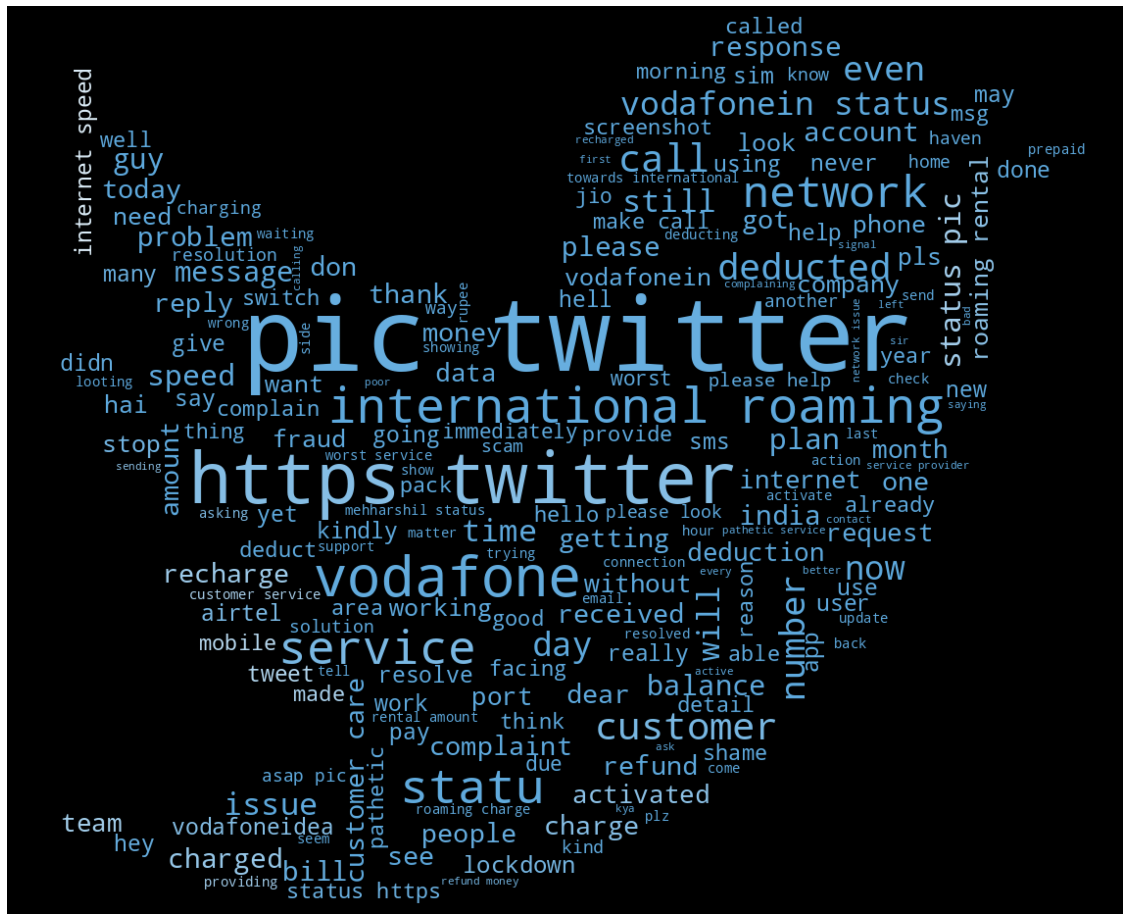

In [40]:
cluster_0_words=' '.join(text for text in cluster_0['Tweet'])
wordcloud(cluster_0_words)

Cluster 0: Telss about the problems related to services - !! Different clusters are formed each time !!

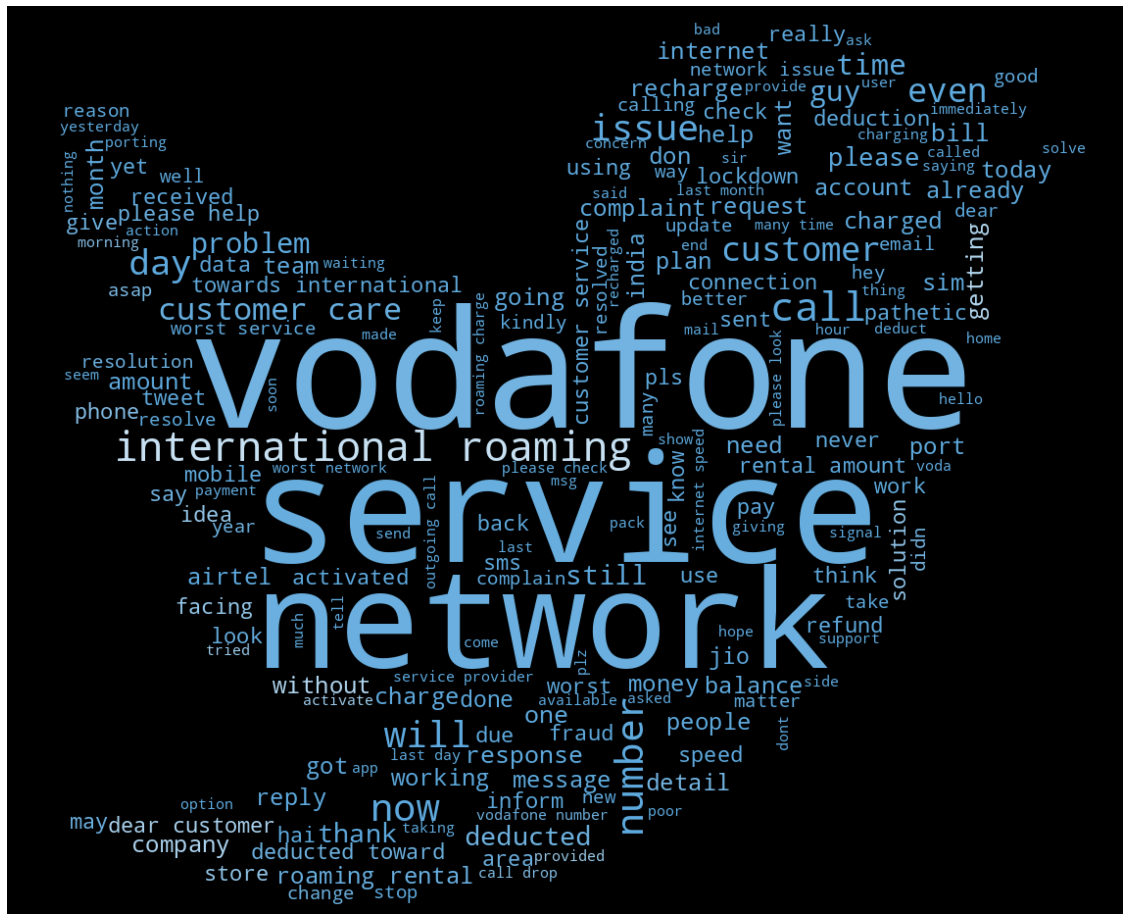

In [41]:
cluster_1=frame[frame['Cluster']==1]
cluster_1_words=' '.join(text for text in cluster_1['Tweet'])
wordcloud(cluster_1_words)

# Kmeans Cluster with 8 Centroids

In [42]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

In [43]:
tweets={'Tweet':df['clean_text'].tolist(),'Cluster':clusters}
frame=pd.DataFrame(tweets, index=[clusters])
frame

Tweet  Cluster
2   please check what happens this not woking sinc...        2
1   network fluctuations and speed pathetic need j...        1
3   this has been going since this absolutely unpr...        3
3   have done recharge but haven got perday with u...        3
0   but when still not received any call from cust...        0
..                                                ...      ...
3         sent contact but still did not get response        3
1   dear have facing network problem for few days ...        1
6   rubbish made many time you didn resolved netwo...        6
3   why the caller tunes sound horrible song heard...        3
3   what nonsense are guys saying getting all the ...        3

[19749 rows x 2 columns]

In [44]:
frame['Cluster'].value_counts()

3    8197
7    2491
4    2238
1    2159
0    1530
5    1470
6    1054
2     610
Name: Cluster, dtype: int64

In [45]:
cluster_0=frame[frame['Cluster']==0]
cluster_0

Tweet  Cluster
0   but when still not received any call from cust...        0
0   today vodafone cim deactivated without any inf...        0
0   worst customer care charged for internet postp...        0
0   request for call back you committed the same i...        0
0   sense complaining such worst network and disre...        0
..                                                ...      ...
0   after days received call from your consumer ca...        0
0   was idea customer why did you changed they rea...        0
0   service request number want port out your serv...        0
0   since last month facing issue regarding incomi...        0
0   provide working customer care number yours wil...        0

[1530 rows x 2 columns]

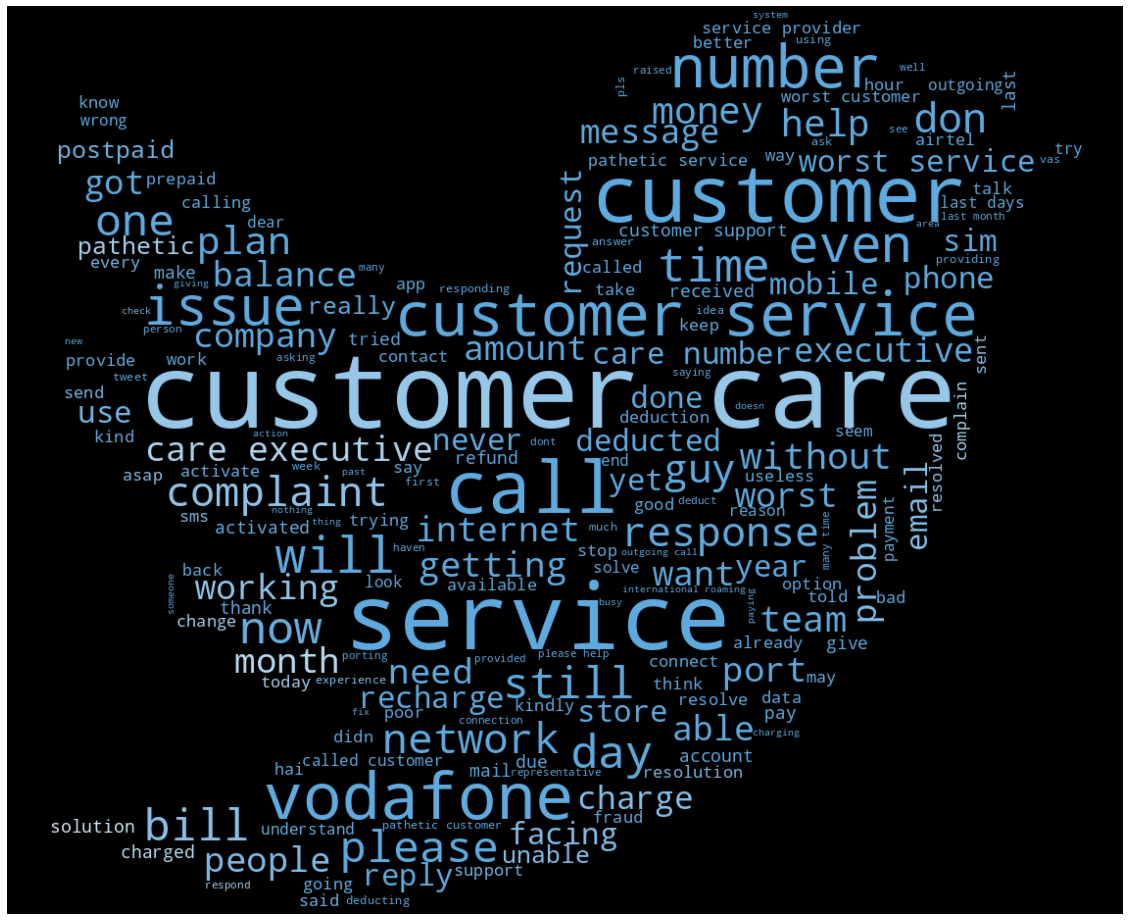

In [46]:
cluster_0=frame[frame['Cluster']==0]
cluster_0_words= ' '.join(text for text in cluster_0['Tweet'])
wordcloud(cluster_0_words)

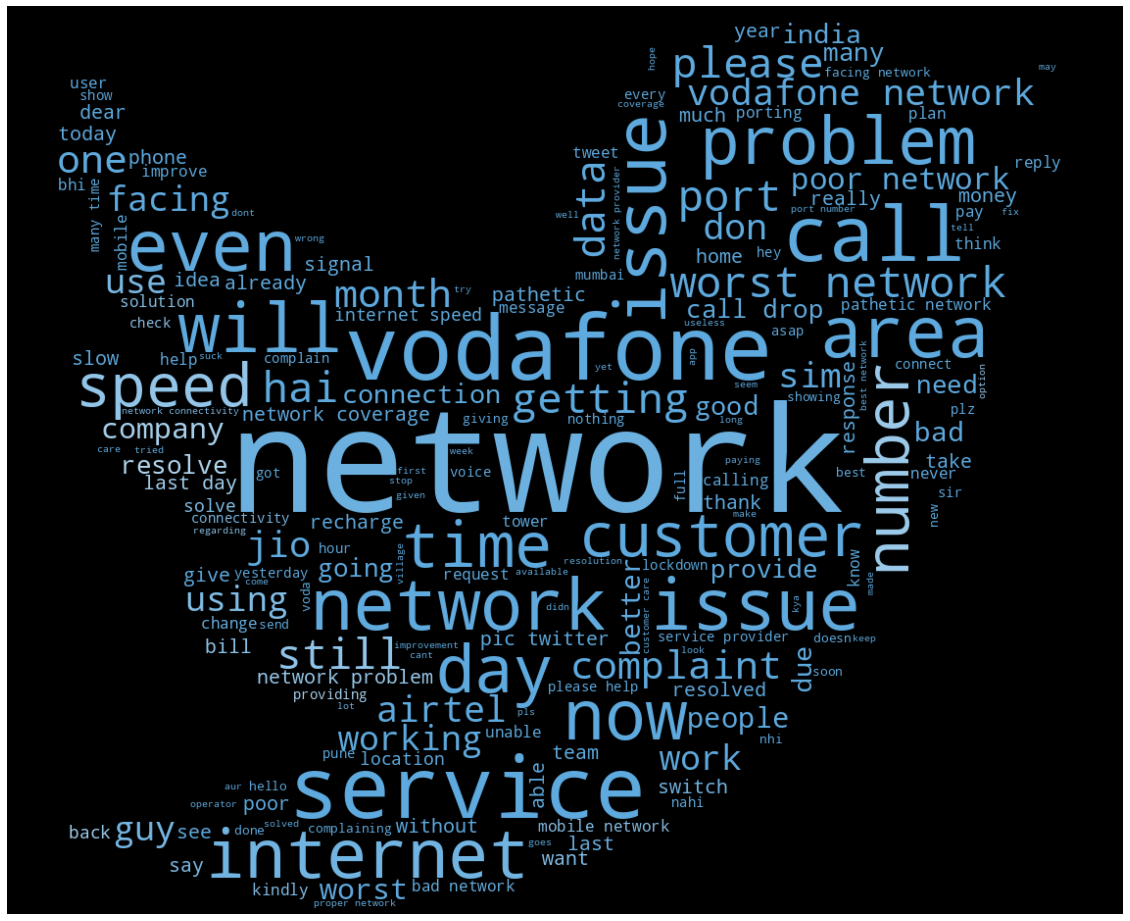

In [47]:
cluster_1=frame[frame['Cluster']==1]
cluster_1_words= ' '.join(text for text in cluster_1['Tweet'])
wordcloud(cluster_1_words)

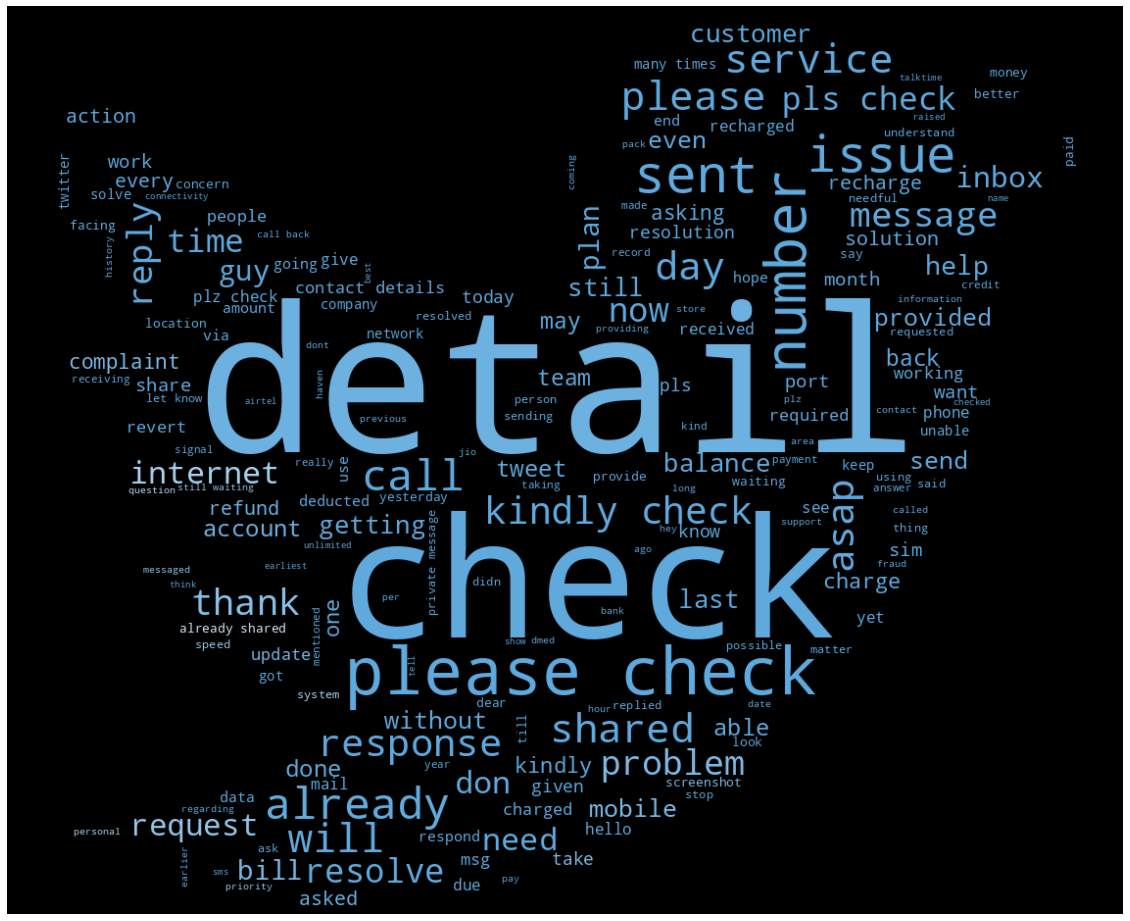

In [48]:
cluster_2=frame[frame['Cluster']==2]
cluster_2_words= ' '.join(text for text in cluster_2['Tweet'])
wordcloud(cluster_2_words)

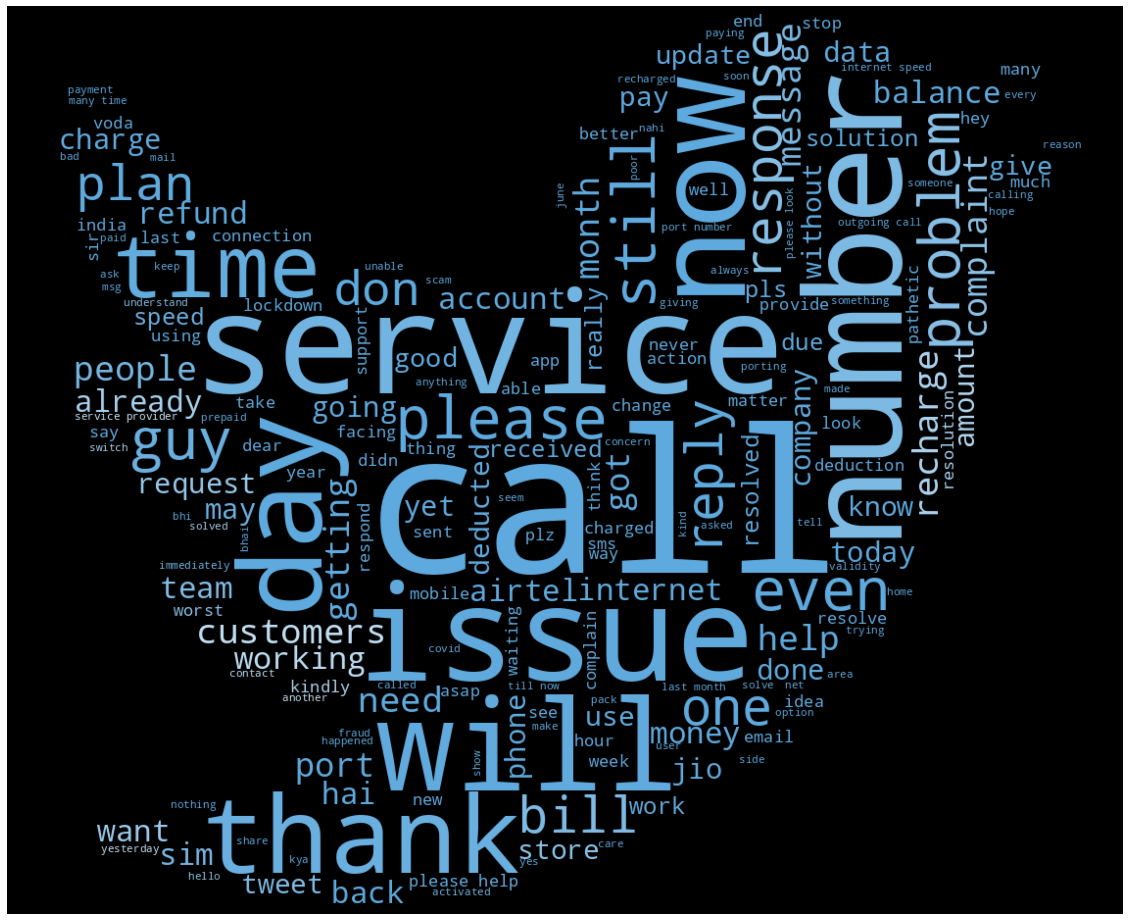

In [49]:
cluster_3=frame[frame['Cluster']==3]
cluster_3_words= ' '.join(text for text in cluster_3['Tweet'])
wordcloud(cluster_3_words)

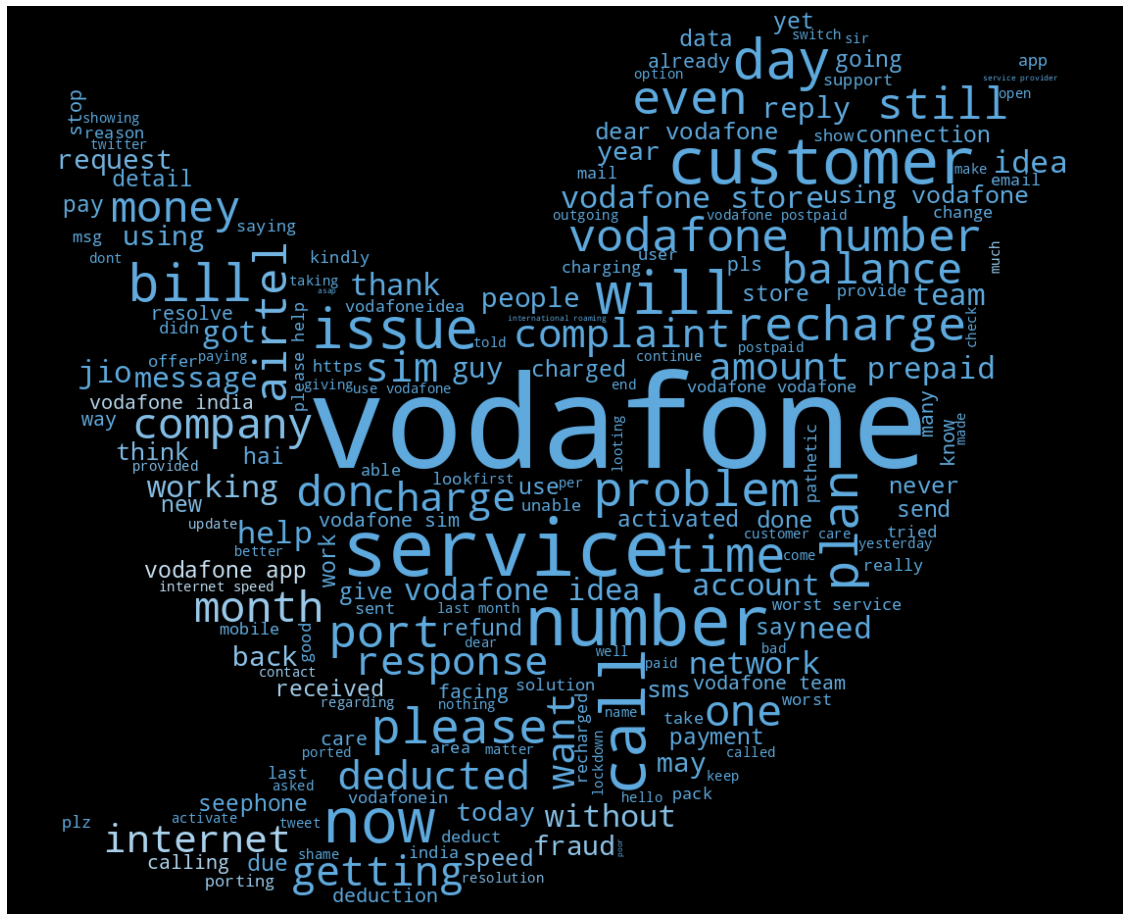

In [50]:
cluster_4=frame[frame['Cluster']==4]
cluster_4_words= ' '.join(text for text in cluster_4['Tweet'])
wordcloud(cluster_4_words)

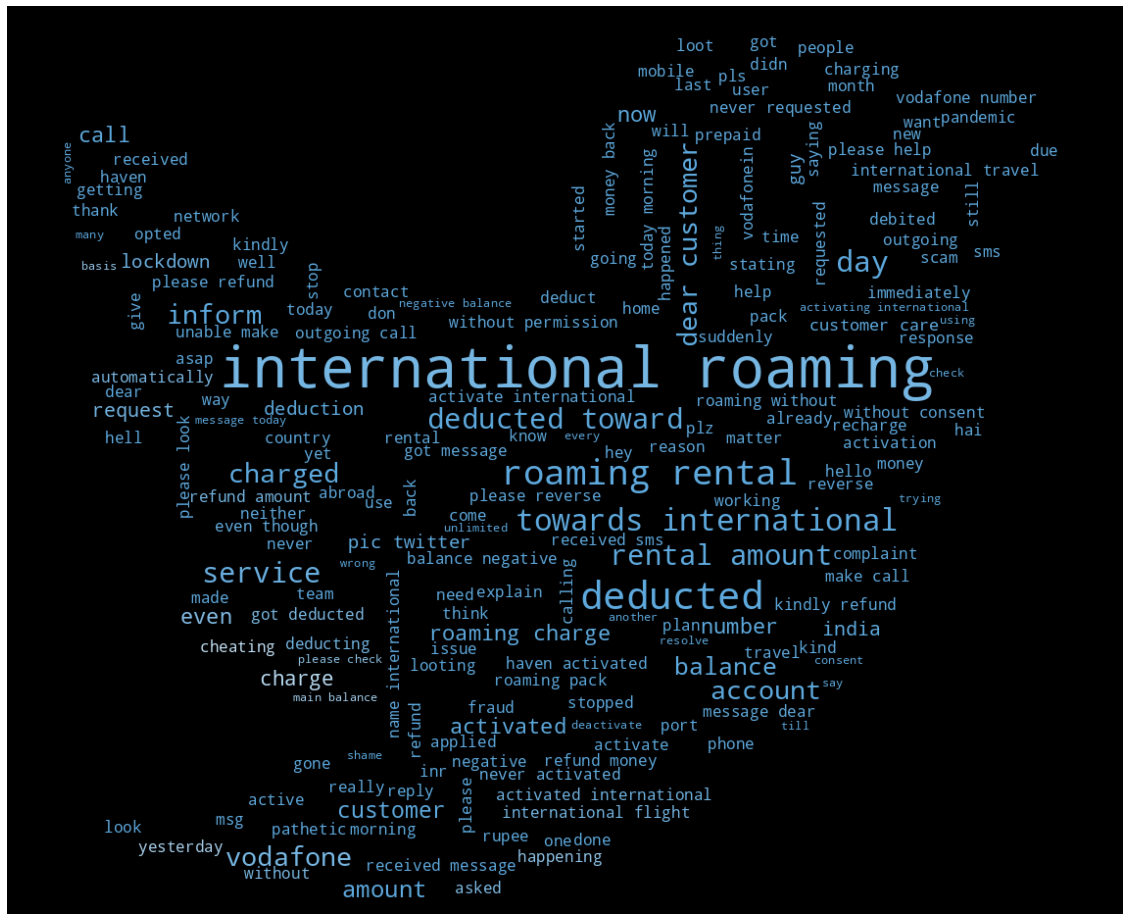

In [51]:
cluster_5=frame[frame['Cluster']==5]
cluster_5_words= ' '.join(text for text in cluster_5['Tweet'])
wordcloud(cluster_5_words)

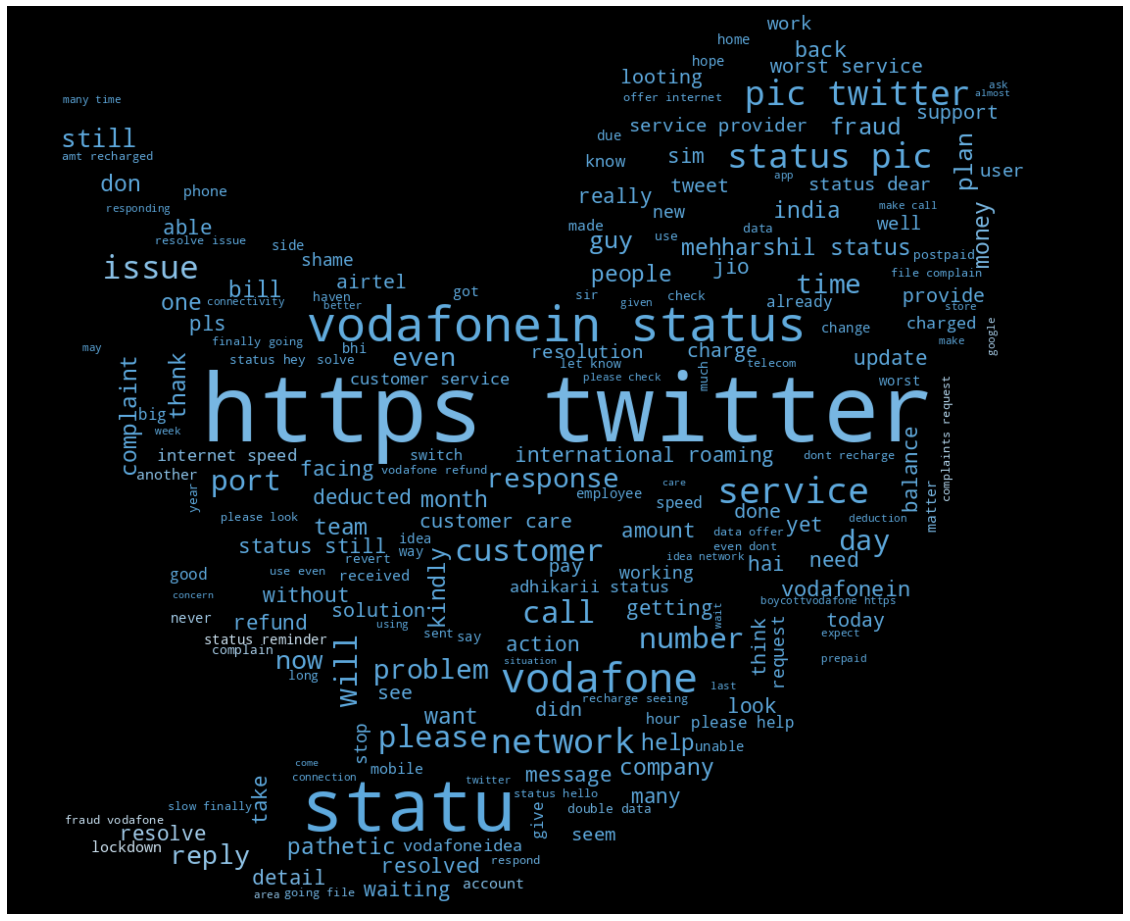

In [52]:
cluster_6=frame[frame['Cluster']==6]
cluster_6_words= ' '.join(text for text in cluster_6['Tweet'])
wordcloud(cluster_6_words)

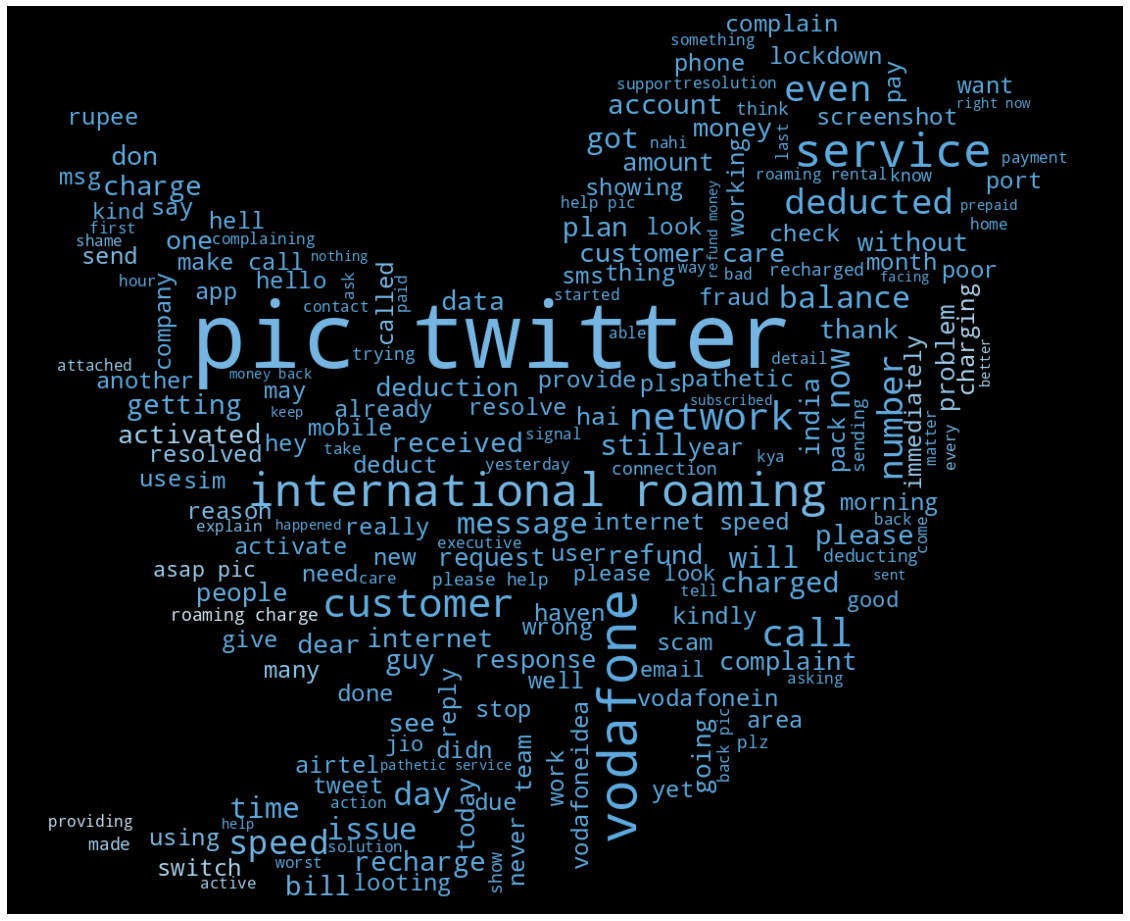

In [53]:
cluster_7=frame[frame['Cluster']==7]
cluster_7_words= ' '.join(text for text in cluster_7['Tweet'])
wordcloud(cluster_7_words)

In [54]:
frame.to_csv("clustered_tweets.csv")

# Define a function

In [55]:
def identify_topics(df,desc_matrix,num_clusters):
    km=KMeans(n_clusters=num_clusters)
    km.fit(desc_matrix)
    clusters=km.labels_.tolist()
    tweets={'Tweet':df['clean_text'].tolist(),'Cluster':clusters}
    frame=pd.DataFrame(tweets,index=[clusters])
    print(frame['Cluster'].value_counts())
    
    for cluster in range(num_clusters):
        cluster_words= ' '.join(text for text in frame[frame['Cluster']==cluster]['Tweet'])
        wordcloud(cluster_words)

1    13250
2     3533
0     1635
3     1331
Name: Cluster, dtype: int64


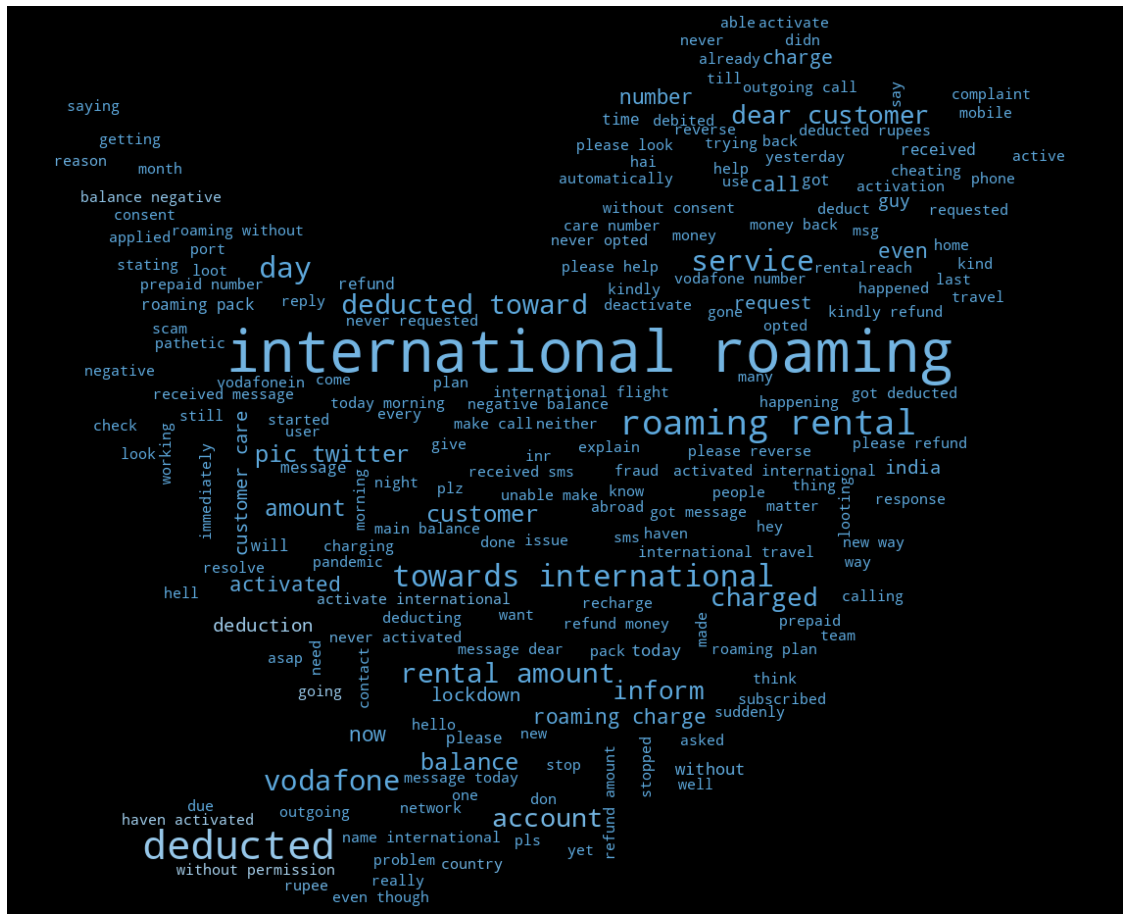

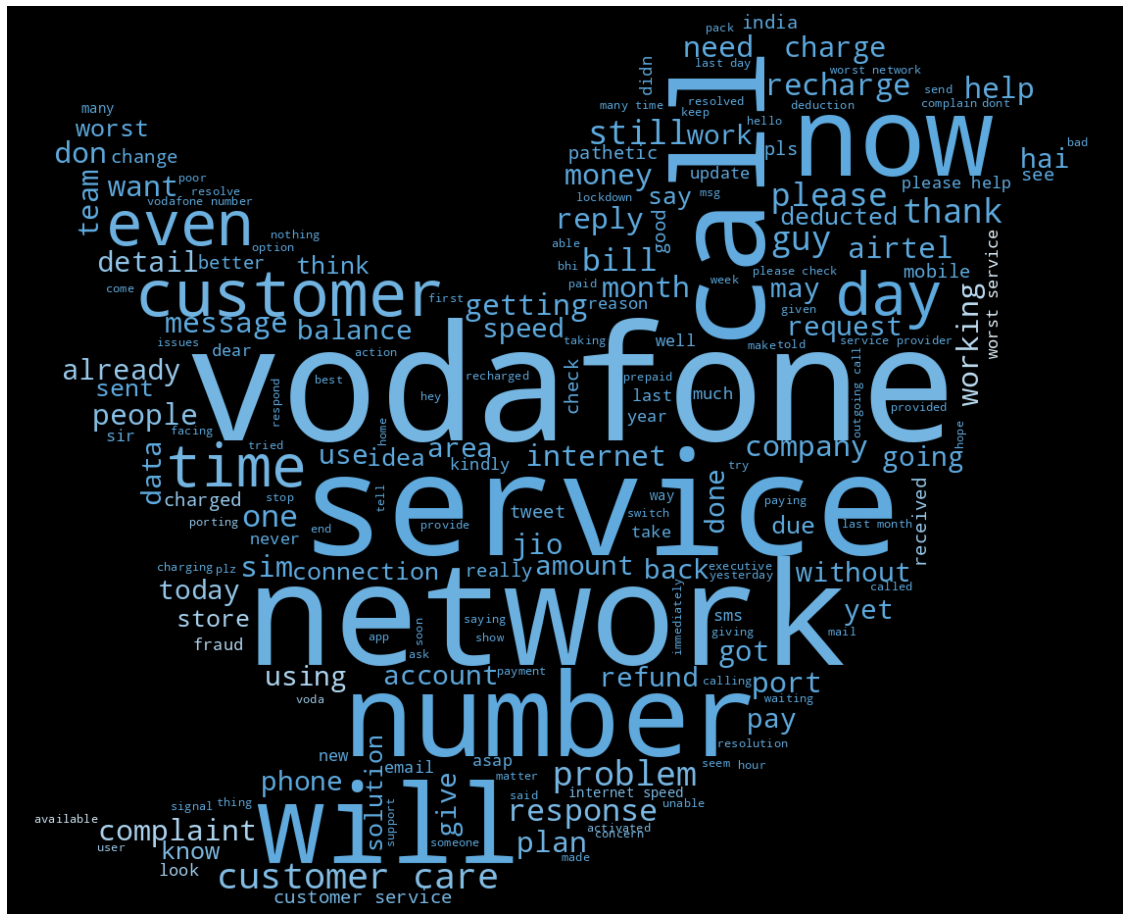

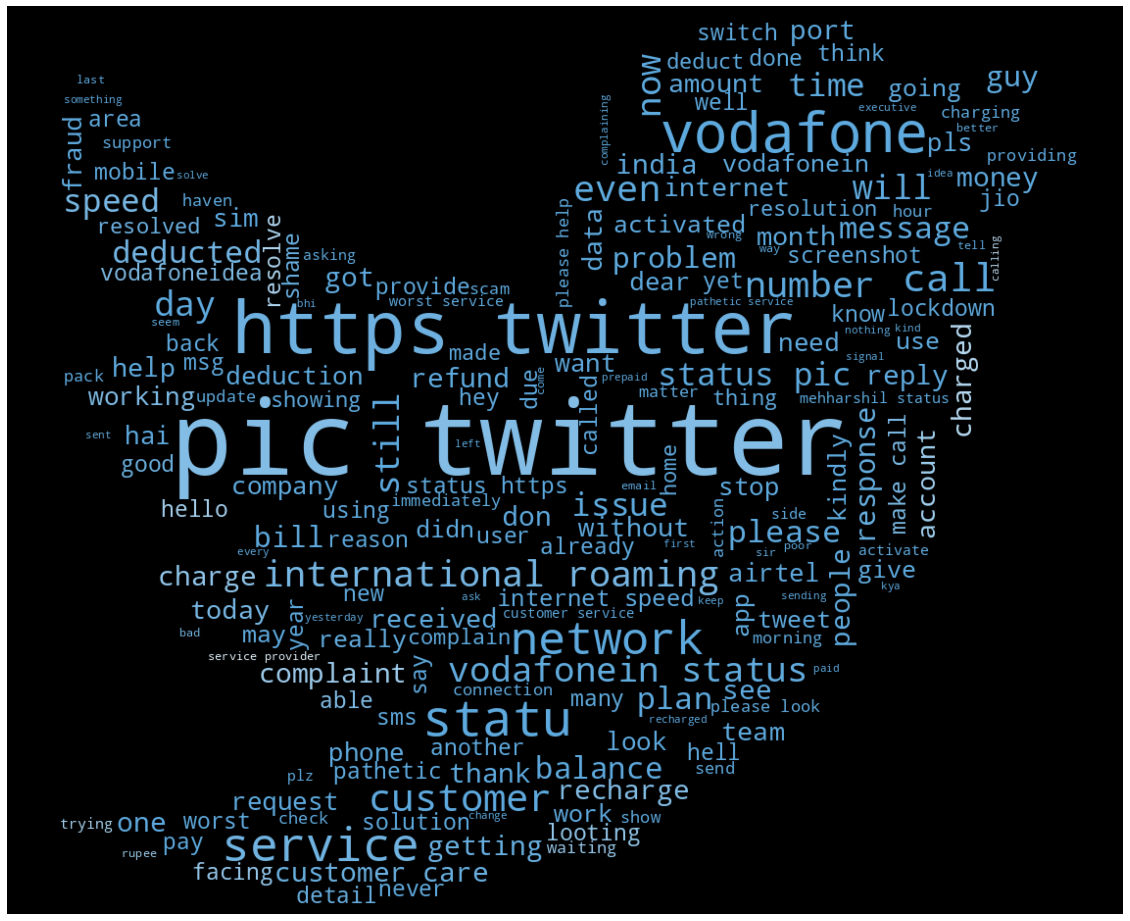

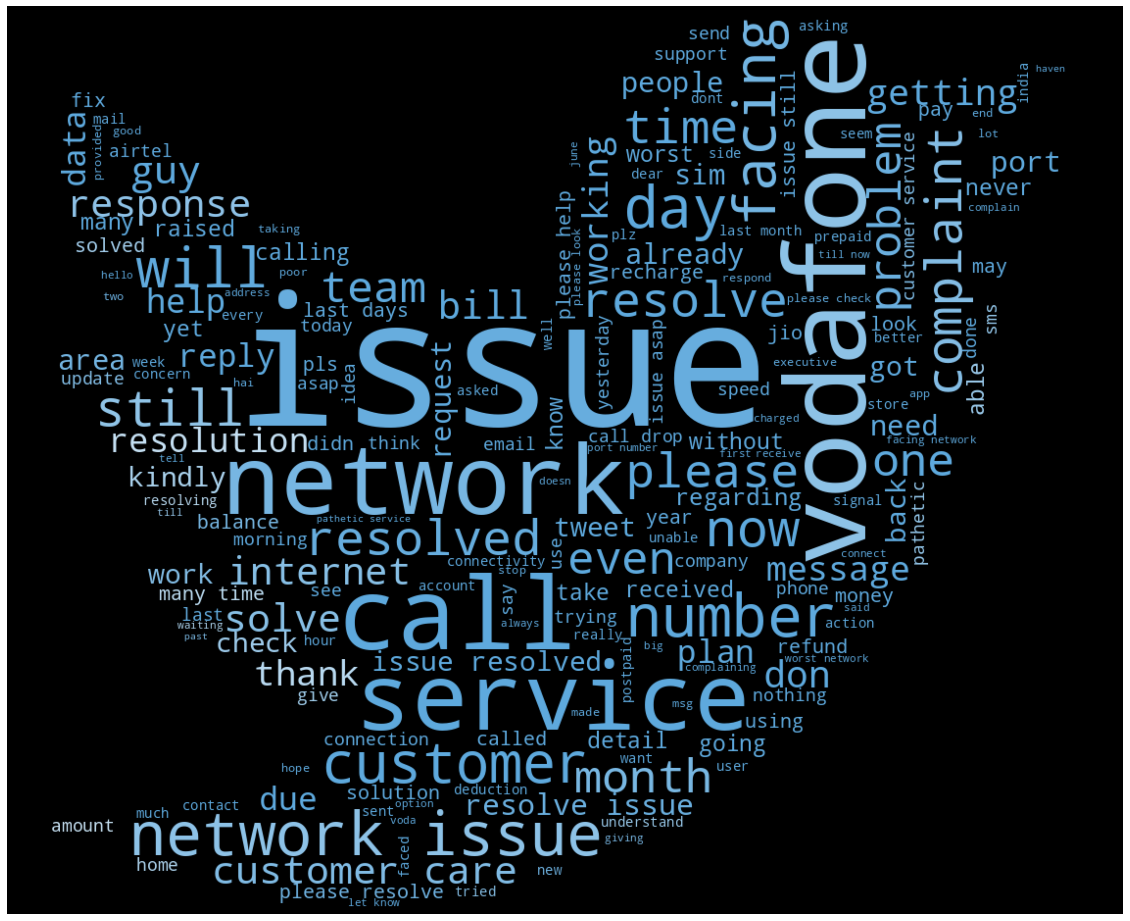

In [56]:
identify_topics(df, desc_matrix,4)

# Conclusion:
Using the customer complaints data of the Vodafone service, categorize customer complaints according to subject.   